#TERCER EXAMEN PARCIAL
---
```
Universidad Nacional de San Antonio Abad del Cusco
Asignatura: Deep Learning
Docente   : Ivan Cesar Medrano Valencia
Autores   : Etson Ronaldao Rojas Cahuana
Fecha     : 31/01/2022
Lugar     : Cusco, Perú
Proposito : Construir un modelo de clasificación de opiniones sobre las reseñas de productos de Amazon
```
---

#Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Leer datos de google drive montado
train_path = '/content/drive/MyDrive/EXAMEN 3 DEEP LEARNING/Amazon_reviews_train.csv'
test_path = '/content/drive/MyDrive/EXAMEN 3 DEEP LEARNING/Amazon_reviews_test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#Mostrar datos

In [ ]:
#print and examine first 5 records
print(train_df.shape, train_df.shape)
train_df.head(10)

(25000, 2) (25000, 2)


,review_text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1
5,an absolute masterpiece: I am quite sure any o...,1
6,"Buyer beware: This is a self-published book, a...",0
7,Glorious story: I loved Whisper of the wicked ...,1
8,A FIVE STAR BOOK: I just finished reading Whis...,1
9,Whispers of the Wicked Saints: This was a easy...,1


 ## Separacion de datos.
  - train_raw: Texto sin procesar para los datos de entrenamiento
  - train_labels: Etiquetas para los datos de entrenamiento
  - test_raw: Texto sin procesar para los datos de test
  - test_labels: Etiquetas para los datos de test

In [ ]:
train_raw = train_df.review_text.values
train_labels = train_df.label.values

In [ ]:
test_raw = test_df.review_text.values
test_labels = test_df.label.values

Mostrar 0-5 opiniones del conjunto de entrenamiento

In [ ]:
train_raw[:5]

array(['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
       'Amazing!: This soundtrack is my fav

#a. Limpieza y preparación de datos:  5 puntos.

Volver a minusculas y tokenizar para cada opinion.

In [ ]:
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_tokens = [word_tokenize(review.lower()) for review in train_raw]
test_tokens = [word_tokenize(review.lower()) for review in test_raw]

Mostrar la tokenizacion de las 5 primeras opiniones.

In [ ]:
#Print the first review from the train data to check if the tokenization worked.
print(train_tokens[0])
print(train_tokens[1])
print(train_tokens[2])
print(train_tokens[3])
print(train_tokens[4])

['stuning', 'even', 'for', 'the', 'non-gamer', ':', 'this', 'sound', 'track', 'was', 'beautiful', '!', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'i', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'i', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'i', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']
['the', 'best', 'soundtrack', 'ever', 'to', 'anything', '.', ':', 'i', "'m", 'reading', 'a', 'lot', 'of', 'reviews', 'saying', 'that', 'this', 'is', 'the', 'best', "'game", 'soundtrack', "'", 'and', 'i', 'figured', 'that', 'i', "'d", 'write', 'a', 'review', 'to', 'disagree', 'a', 'bit', '.', 'this', 'in

Aun nos faltará hacer mas limpiezas, puesto que se tokenizaron algunos signos de puntuacion y otros caracteres.

In [ ]:
#Descargar un corpus de stopwords
stop_punct = list(punctuation)
nltk.download("stopwords")
stop_nltk = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def drop_stop(input_tokens):
    return [token for token in input_tokens if token not in stop_final]

In [ ]:
stop_final = stop_punct + stop_nltk

In [ ]:
train_tokens_no_stop = [drop_stop(sent) for sent in train_tokens]
test_tokens_no_stop = [drop_stop(sent) for sent in test_tokens]

Mostrar las 5 primeras opiniones tokenizadas y limpiadas de los signos de puntuacion y otros caracteres que son considerados como stopwords (palabras o simbolos que no aportaran mucho)

In [ ]:
print(train_tokens_no_stop[0])

['stuning', 'even', 'non-gamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '^_^']


Reduccion de las palabras a su forma base con stemmer

In [ ]:
stemmer_p = PorterStemmer()

In [ ]:
train_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in train_tokens_no_stop]
test_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in test_tokens_no_stop]

In [ ]:
print(train_tokens_stem[0])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '^_^']


In [ ]:
train_texts = [" ".join(txt) for txt in train_tokens_stem]
test_texts = [" ".join(txt) for txt in test_tokens_stem]

Juntar palabras para tener un texto

In [ ]:
print(train_texts[0])

stune even non-gam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen ^_^


#Tokenizar 

In [ ]:
vocab_size = 10000

In [ ]:
tok = Tokenizer(num_words=vocab_size)

In [ ]:
tok.fit_on_texts(train_texts)

In [ ]:
train_sequences = tok.texts_to_sequences(train_texts)
test_sequences = tok.texts_to_sequences(test_texts)

In [ ]:
print(train_sequences[0])

[22, 514, 7164, 85, 190, 184, 1098, 283, 20, 11, 1267, 22, 56, 370, 9687, 114, 41, 71, 114, 8169, 1454, 114, 51, 71, 29, 41, 58, 181, 2932, 2153, 75, 8170, 816, 2666, 829, 719, 3871, 11, 483, 120, 268, 110]


In [ ]:
seq_lens = [len(seq) for seq in train_sequences]

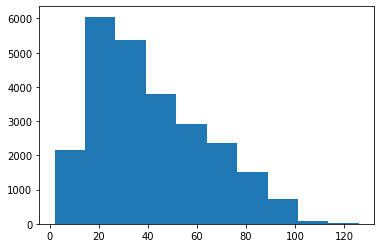

In [ ]:
plt.hist(seq_lens)
plt.show()

In [ ]:
maxlen = 100

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)
X_train.shape

(25000, 100)

#b. Construcción del modelo:	6 puntos.

Definicion del modelo LSTM bidireccional, con dos capas densas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Dropout, GRU, LSTM

Consideramos un dropout de 0.4

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.4))

In [ ]:
model_lstm.add(Dense(1, activation='sigmoid'))
 
model_lstm.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                      

Mostrar informacion de GPU

In [ ]:
import tensorflow, keras
print("Versions\nKeras:", keras.__version__,"\nTensorFlow: ",tensorflow.__version__)
print("GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')),'\nDevice: ',tensorflow.test.gpu_device_name())
print('\n=====Informacion completa del GPU=====')
!nvidia-smi

Versions
Keras: 2.7.0 
TensorFlow:  2.7.0
GPUs Available:  1 
Device:  /device:GPU:0

=====Informacion completa del GPU=====
Mon Jan 31 16:53:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    73W / 149W |    371MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------

In [ ]:
history_lstm = model_lstm.fit(X_train, train_labels, batch_size=128, validation_split=0.2, epochs = 8)

Epoch 1/8
157/157 [==============================] - 14s 63ms/step - loss: 0.5500 - accuracy: 0.7122 - val_loss: 0.4019 - val_accuracy: 0.8246
Epoch 2/8
157/157 [==============================] - 9s 57ms/step - loss: 0.3499 - accuracy: 0.8661 - val_loss: 0.3493 - val_accuracy: 0.8434
Epoch 3/8
157/157 [==============================] - 9s 58ms/step - loss: 0.2949 - accuracy: 0.8899 - val_loss: 0.3707 - val_accuracy: 0.8572
Epoch 4/8
157/157 [==============================] - 9s 60ms/step - loss: 0.2649 - accuracy: 0.9025 - val_loss: 0.3509 - val_accuracy: 0.8546
Epoch 5/8
157/157 [==============================] - 10s 61ms/step - loss: 0.2435 - accuracy: 0.9112 - val_loss: 0.3702 - val_accuracy: 0.8514
Epoch 6/8
157/157 [==============================] - 9s 57ms/step - loss: 0.2267 - accuracy: 0.9189 - val_loss: 0.3753 - val_accuracy: 0.8488
Epoch 7/8
157/157 [==============================] - 9s 57ms/step - loss: 0.2124 - accuracy: 0.9239 - val_loss: 0.4011 - val_accuracy: 0.8544
Epoc

#c. Matriz de Confusión y puntuación de la predicción en el conjunto de prueba:	  5 puntos.

Mostramos la grafica de entrenamiento para pocas epocas, se probo con mas epocas, teniendo una tendencia a overfiting y se redujo a 8

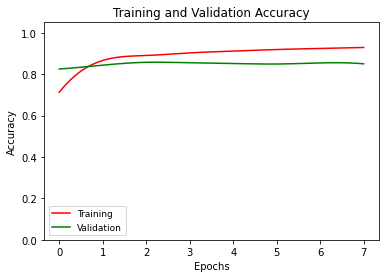

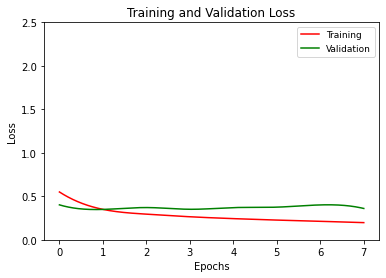

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.interpolate import make_interp_spline
xfer_acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
xfer_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(len(xfer_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = make_interp_spline(x1, y1)(x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'lower left', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = make_interp_spline(x1, y1)(x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,2.5)
plt.show()

In [ ]:
#Para Tensorflow menor a 2.5
#test_pred = model_lstm.predict_classes(X_test)

#Para Tensorflow 2.7
predict_x=model_lstm.predict(X_test) 
test_pred=np.argmax(predict_x,axis=1)

Mostrar matriz de confusion.

In [ ]:
test_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(test_labels, test_pred))

[[ 9874  2283]
 [ 1331 11512]]


Mostrar desempeño con los datos de test

In [ ]:
print(accuracy_score(test_labels, test_pred))

0.85544


#d. 3 ejemplos de predicciones de opiniones desconocidas: 4 puntos.

Modulo para predecir textos de forma manual.

In [ ]:
def predecir_texto_lstm(texto):
  predecir_texto=tok.texts_to_sequences([texto])
  predict_x=model_lstm.predict(predecir_texto)
  print('Prediccion: ',predict_x)

## Prediccion positiva(mayor a 0.5)

In [ ]:
#Positivo
inp_review = "I love amazon products"
predecir_texto_lstm(inp_review)

Prediccion:  [[0.74040395]]


In [ ]:
#Positivo
inp_review = "The products they send are very good and arrive on time"
predecir_texto_lstm(inp_review)

Prediccion:  [[0.86909777]]


## Prediccion negativa(menor a 0.5)

In [ ]:
#Negativo
inp_review = "I think now sellers have realized that it is very difficult to produce fake four or five star reviews."
predecir_texto_lstm(inp_review)

Prediccion:  [[0.1943407]]


In [ ]:
#Negativo
inp_review = "But when more and more started to arrive, I noticed that sales dropped drastically"
predecir_texto_lstm(inp_review)

Prediccion:  [[0.2745566]]
